# EE6310 - Image and Video Processing

Homework-3

## Imports

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import os
import random
from skimage.color import rgb2gray
import cv2
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### Images

Images used in this Assignment are GrayScale. Images are downloaded from
1. University of Southern California’s image database at http://sipi.usc.edu/database/database.php?volume=misc.
2. Free images from NASA’s site: http://apod.nasa.gov/apod/archivepix.html.


## Q1 - 2D-DFT

### Functions
- DFT as a summation over two dimensions
- IDFT as a summation over two dimensions
- DFT as matrix multiplication using the complex exponential matrix
- IDFT as matrix multiplication using the complex exponential matrix

#### DFT as a summation over two dimensions

$\tilde{I}(u, v)=\sum_{i=0}^{N-1} \sum_{j=0}^{M-1} I(i, j) W_{N}^{u i} W_{M}^{v j}$

In [2]:
def DFTSummation(I):
    N = I.shape[0]
    W = np.exp(-1.0 * 2j * np.pi/N)

    I_DFT = 1j * np.zeros(I.shape)
    
    for u in range(N):
        for v in range(N):
            for i in range(N):
                for j in range(N):
                    I_DFT[u][v] += (I[i][j] * pow(W,(u*i + v*j)))
    return I_DFT

#### IDFT as a summation over two dimensions

$I(i, j)=\frac{1}{N^2}\sum_{u=0} \sum_{v=0}^{N-1} \tilde{I}(u, v) W_{N}^{-u i} W_{M}^{-v j}$

In [3]:
def IDFTSummation(I_DFT):
    N = I_DFT.shape[0]
    W = np.exp(-1.0 * 2j * np.pi/N)

    I_IDFT = 1j * np.zeros(I_DFT.shape)
    
    for i in range(N):
        for j in range(N):
            for u in range(N):
                for v in range(N):
                    I_IDFT[i][j] += (I_DFT[u][v] * pow(W,-(u*i + v*j)))
                    
    I_IDFT = I_IDFT/(N*N)
                    
    return np.round(I_IDFT).real

#### DFT as matrix multiplication using the complex exponential matrix

$\mathbf{W}_{N}=\left[\begin{array}{cccc}1 & 1 & \ldots & 1 \\ 1 & W_{N} & \ldots & W_{N}^{N-1} \\ \vdots 1 & W_{N}^{N-1} & \ldots & W_{N}^{(N-1)^{2}}\end{array}\right]$

$\tilde{\mathbf{I}}=\mathbf{W}_{N} \mathbf{I} \mathbf{W}_{N}$

In [4]:
def DFTMatrixMultiplication(I):
    N = I.shape[0]
    w = np.exp(-1.0 * 2j * np.pi/N)

    W = 1j * np.zeros(I.shape)
    
    for i in range(N):
        for j in range(N):
            W[i][j] = pow(w,i*j)
            
    I_DFT = np.dot(W,np.dot(I,W))
    return I_DFT

#### IDFT as matrix multiplication using the complex exponential matrix

$\mathbf{W}_{N}^{-1}=\frac{1}{N} \mathbf{W}_{N}^{*}=\left[\begin{array}{cccc}1 & 1 & \ldots & 1 \\ 1 & W_{N}^{-1} & \ldots & W_{N}^{-(N-1)} \\ \vdots 1 & W_{N}^{-(N-1)} & \ldots & W_{N}^{-(N-1)^{2}}\end{array}\right]$

$\mathbf{I} = \mathbf{W}_{N}^{-1} \tilde{\mathbf{I}} \mathbf{W}_{N}^{-1}$

In [5]:
def IDFTMatrixMultiplication(I_DFT):
    N = I_DFT.shape[0]
    w = np.exp(-1.0 * 2j * np.pi/N)

    W = 1j * np.zeros(I_DFT.shape)
    
    for i in range(N):
        for j in range(N):
            W[i][j] = pow(w,i*j)
            
    Winv = np.linalg.inv(W)
    I_IDFT = np.dot(Winv,np.dot(I_DFT,Winv))
    
    I_IDFT = I_IDFT
    return np.round(I_IDFT).real

#### Centered DFT

It is DFT of $(−1)^{i+j}$ I 

In [6]:
def CenteredDFT(img):
    
    I = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            I[i][j] = pow(-1,i+j) * img[i][j]
            
    return DFTMatrixMultiplication(I)

Reading and Displaying Image

Image-1:


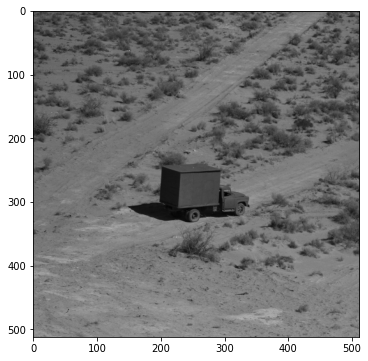

Image-2:


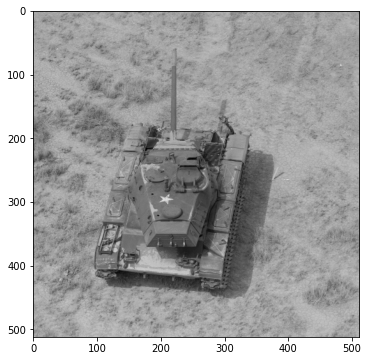

Image-3:


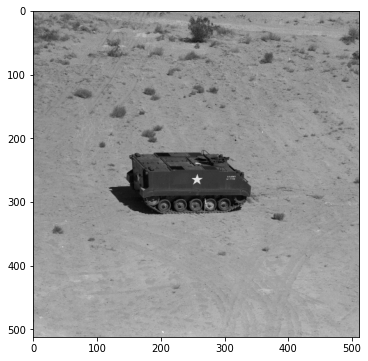

In [7]:
img1 = pimg.imread('Images/7.1.01.tiff')
img2 = pimg.imread('Images/7.1.03.tiff')
img3 = pimg.imread('Images/7.1.08.tiff')
Images = (img1, img2, img3)

# Displaying Image
for i in range(len(Images)):
	print ("Image-"+str(i+1)+":")
	img = Images[i]

	plt.figure(figsize=(6,6))
	plt.imshow(img,cmap='gray')
	plt.show()

As summation operation over $(512, 512)$ image is expensive, we will be doing it over $(32, 32)$ part of same image and show that DFT/IDFT by summation or matrix multiplication leads to same result

In [8]:
# Verifying DFT
print ("Results of DFTs are same:", np.array_equal(np.round(DFTSummation(img1[:32,:32]), decimals=7),np.round(DFTMatrixMultiplication(img1[:32,:32]), decimals=7)))

# Verifying IDFT
print ("Results of IDFTs are same:", np.array_equal(IDFTSummation(np.round(DFTSummation(img1[:32,:32]), decimals=7)), IDFTSummation(np.round(DFTMatrixMultiplication(img1[:32,:32]), decimals=7))))

Results of DFTs are same: True
Results of IDFTs are same: True


### 1.1

Displaying the image, its DFT magnitude, phase, DFT magnitude subject to the logarithmic transformation.

Image-1:


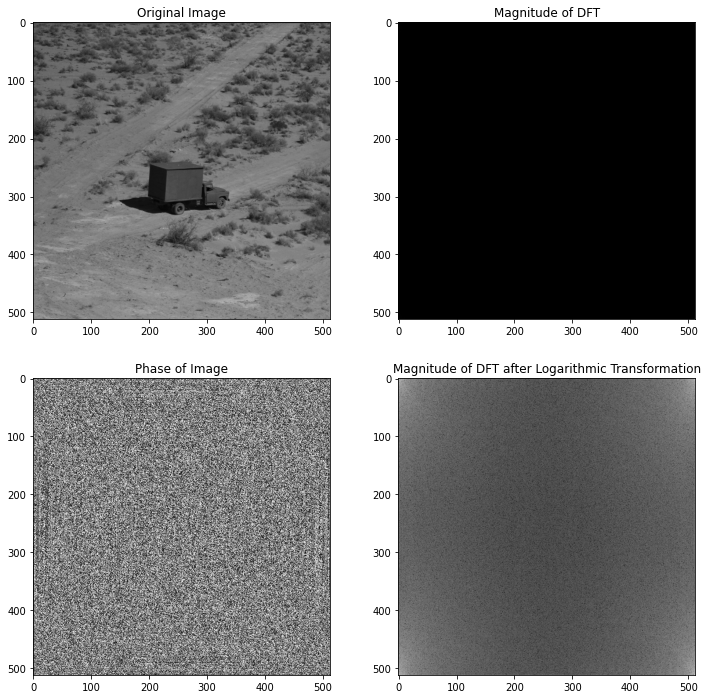

Image-2:


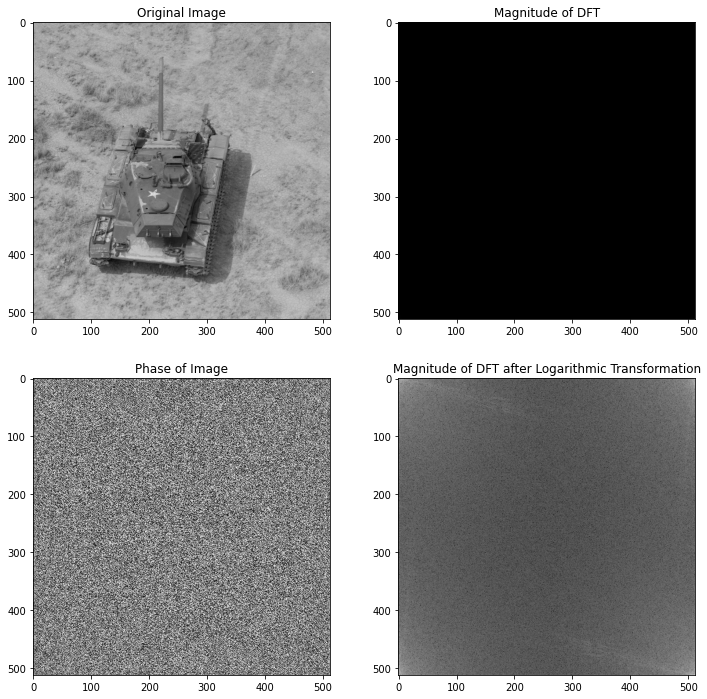

Image-3:


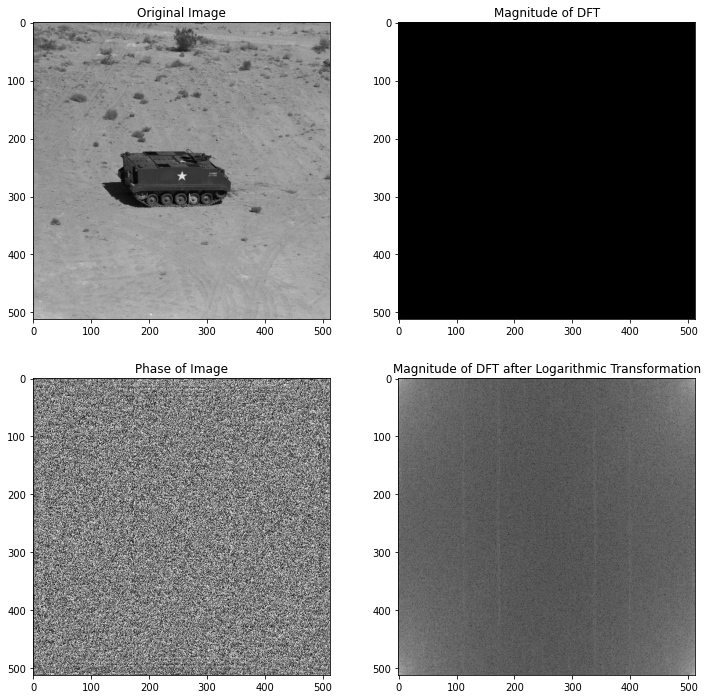

In [9]:
for i in range(len(Images)):
	print ("Image-"+str(i+1)+":")
	img = Images[i]

	# DFT of Image
	imgDFT = DFTMatrixMultiplication(img)

	# Magnitude of DFT of Image after logarithmic transformation
	J = np.log2(1 + abs(imgDFT))
	A = np.min(J)
	B = np.max(J)
	K = 256

	P = (K-1)/(B - A)
	L = -A*(K-1)/(B - A)
	J_FSCS = (P*J + L).astype(int)

	# Displaying Results
	plt.figure(figsize=(12,12))

	plt.subplot(2,2,1)
	plt.imshow(img,cmap='gray')
	plt.title("Original Image")

	plt.subplot(2,2,2)
	plt.imshow(np.abs(imgDFT),cmap='gray')
	plt.title("Magnitude of DFT")

	plt.subplot(2,2,3)
	plt.imshow(np.angle(imgDFT),cmap='gray')
	plt.title("Phase of Image")

	plt.subplot(2,2,4)
	plt.imshow(J_FSCS,cmap='gray')
	plt.title("Magnitude of DFT after Logarithmic Transformation")

	plt.show()

### 1.2
Generating the centered DFT using (−1)i+jI and display its magnitude.

Image-1:


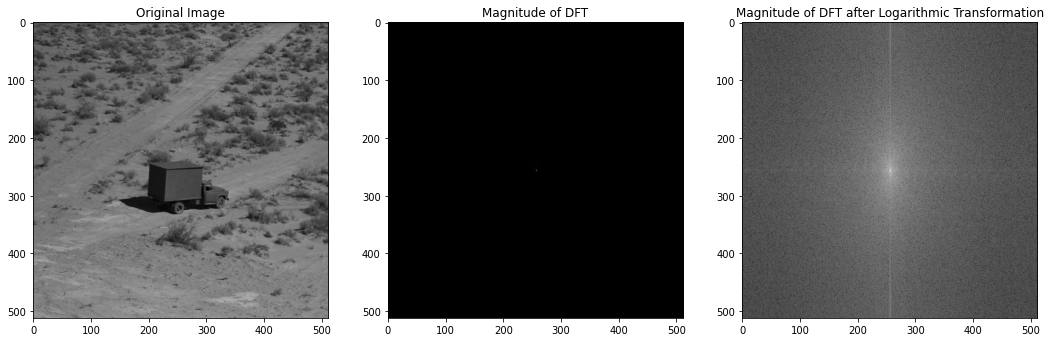

Image-2:


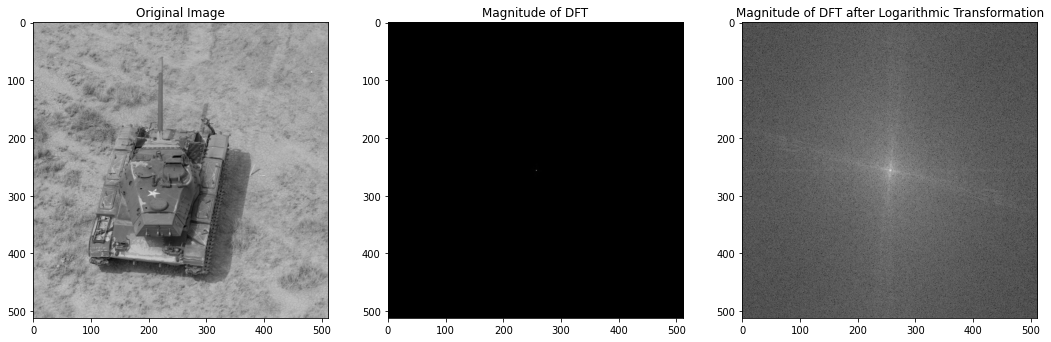

Image-3:


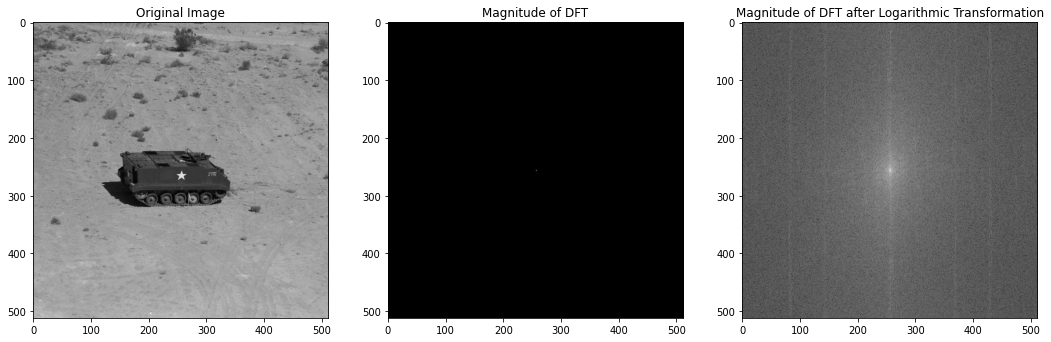

In [10]:
for i in range(len(Images)):
	print ("Image-"+str(i+1)+":")
	img = Images[i]

	# DFT of Image
	imgCDFT = CenteredDFT(img)

	# Magnitude of DFT of Image after logarithmic transformation
	J = np.log2(1 + abs(imgCDFT))
	A = np.min(J)
	B = np.max(J)
	K = 256

	P = (K-1)/(B - A)
	L = -A*(K-1)/(B - A)
	J_FSCS = (P*J + L).astype(int)


	# Displaying Results
	plt.figure(figsize=(18,6))

	plt.subplot(1,3,1)
	plt.imshow(img,cmap='gray')
	plt.title("Original Image")

	plt.subplot(1,3,2)
	plt.imshow(np.abs(imgCDFT),cmap='gray')
	plt.title("Magnitude of DFT")

	plt.subplot(1,3,3)
	plt.imshow(J_FSCS,cmap='gray')
	plt.title("Magnitude of DFT after Logarithmic Transformation")

	plt.show()

### 1.3
Verifying that IDFT[DFT[I]] = I.

In [11]:
for i in range(len(Images)):
	print ("Image-"+str(i+1)+":")
	img = Images[i]

	# DFT
	DFT = DFTMatrixMultiplication(img)

	# IDFT of DFT
	IDFT = IDFTMatrixMultiplication(DFT)

	# Verifying
	print ("IDFT[DFT[I]] = I is", np.array_equal(IDFT, img))

Image-1:
IDFT[DFT[I]] = I is True
Image-2:
IDFT[DFT[I]] = I is True
Image-3:
IDFT[DFT[I]] = I is True


### 1.4

Importance of Phase of an Image.

#### Transpose of Phase

Image-1:


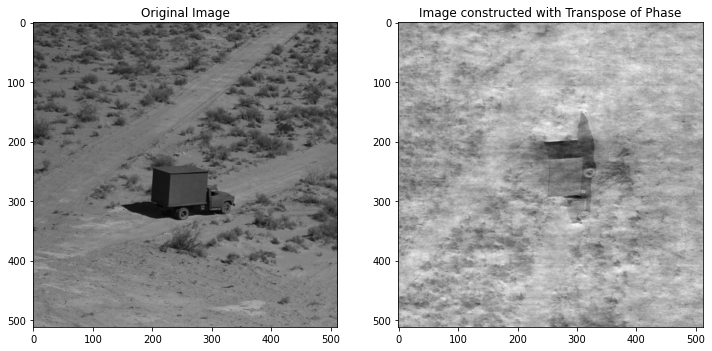

Image-2:


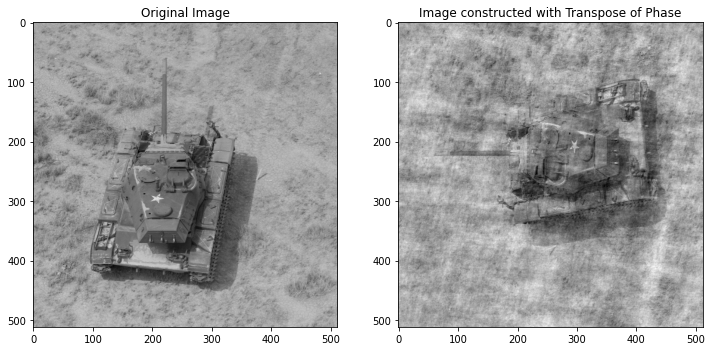

Image-3:


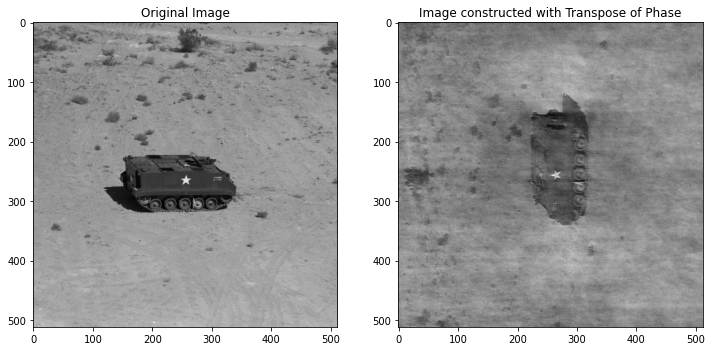

In [12]:
for i in range(len(Images)):
	print ("Image-"+str(i+1)+":")
	img = Images[i]

	# DFT
	DFT = DFTMatrixMultiplication(img)

	# Magnitude and Phase
	Magnitude = np.abs(DFT)
	Phase = np.angle(DFT)

	# Transpose of Phase
	New_Phase = np.transpose(Phase)

	# Resynthesis of Image
	New_DFT = np.multiply(Magnitude,np.exp(1j * New_Phase))
	new_img = IDFTMatrixMultiplication(New_DFT)

	# Diplaying Results
	plt.figure(figsize = (12,6))

	plt.subplot(1,2,1)
	plt.imshow(img,cmap='gray')
	plt.title("Original Image")

	plt.subplot(1,2,2)
	plt.imshow(new_img,cmap='gray')
	plt.title("Image constructed with Transpose of Phase")

	plt.show()

#### Setting Phase to zero

Image-1:


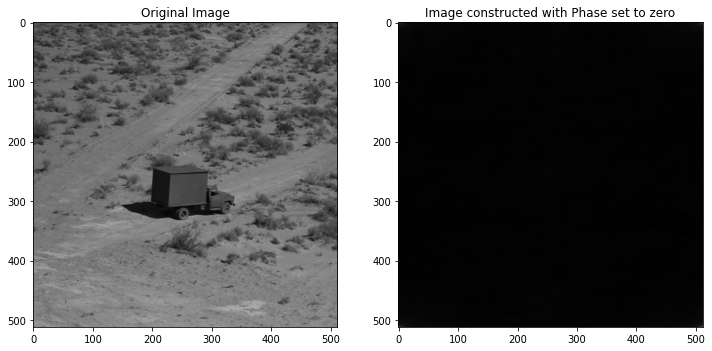

Image-2:


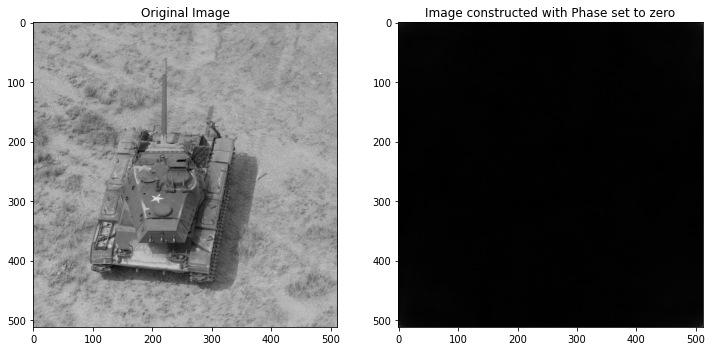

Image-3:


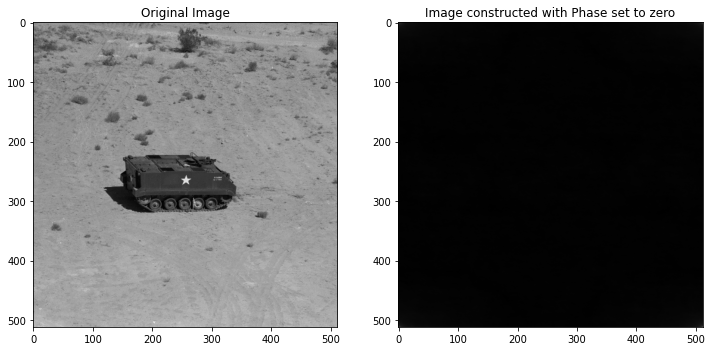

In [13]:
for i in range(len(Images)):
	print ("Image-"+str(i+1)+":")
	img = Images[i]

	# DFT
	DFT = DFTMatrixMultiplication(img)

	# Magnitude and Phase
	Magnitude = np.abs(DFT)
	Phase = np.angle(DFT)

	# Setting Phase to zero
	New_Phase = np.zeros(Phase.shape)

	# Resynthesis of Image
	New_DFT = np.multiply(Magnitude,np.exp(1j * New_Phase))
	new_img = IDFTMatrixMultiplication(New_DFT)

	# Diplaying Results
	plt.figure(figsize = (12,6))

	plt.subplot(1,2,1)
	plt.imshow(img,cmap='gray')
	plt.title("Original Image")

	plt.subplot(1,2,2)
	plt.imshow(new_img,cmap='gray')
	plt.title("Image constructed with Phase set to zero")

	plt.show()

#### Adding noise to Phase

Image-1:


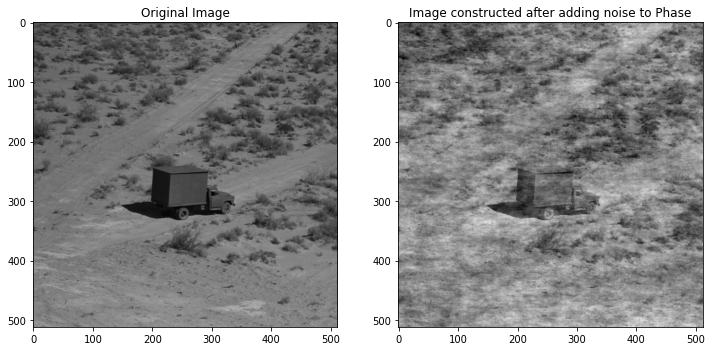

Image-2:


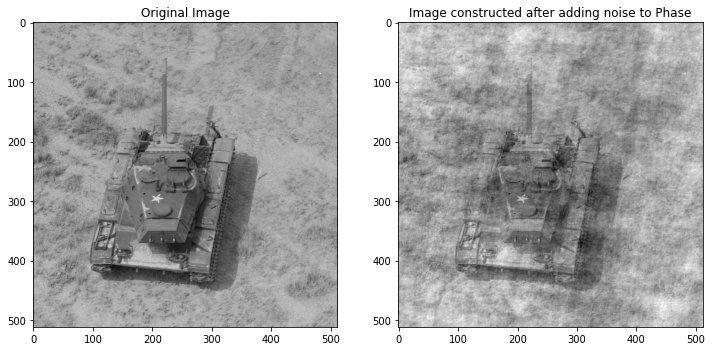

Image-3:


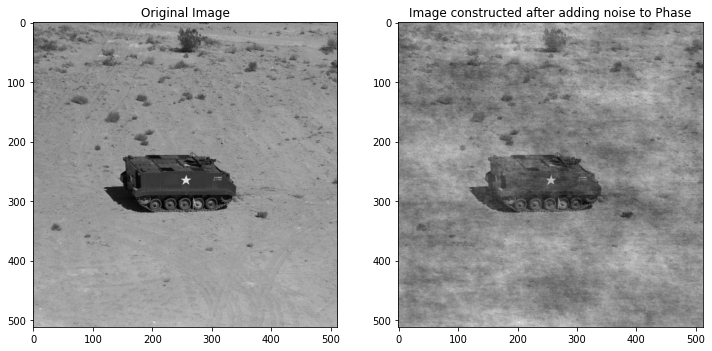

In [14]:
for i in range(len(Images)):
	print ("Image-"+str(i+1)+":")
	img = Images[i]

	# DFT
	DFT = DFTMatrixMultiplication(img)

	# Magnitude and Phase
	Magnitude = np.abs(DFT)
	Phase = np.angle(DFT)

	# Adding Noise to Phase
	New_Phase = Phase + np.random.randn(Phase.shape[0], Phase.shape[1])

	# Resynthesis of Image
	New_DFT = np.multiply(Magnitude,np.exp(1j * New_Phase))
	new_img = IDFTMatrixMultiplication(New_DFT)

	# Diplaying Results
	plt.figure(figsize = (12,6))

	plt.subplot(1,2,1)
	plt.imshow(img,cmap='gray')
	plt.title("Original Image")

	plt.subplot(1,2,2)
	plt.imshow(new_img,cmap='gray')
	plt.title("Image constructed after adding noise to Phase")

	plt.show()

## Q2 - Periodic Convolution

### Functions
- Circular Convolution of Image and Filter
- Padding Image and Filter to size Dimensions

#### Circular Convolution of Image and Filter

In [15]:
def CircularConvolution(I, F):
    n1,m1 = I.shape
    n2,m2 = F.shape
    
    J = np.zeros(I.shape)
    
    for i in range(n1):
        for j in range(m1):
            for p in range(n2):
                for q in range(m2):
                    J[i][j] = J[i][j] + (F[p][q] * I[(i-p)%n1][(j-q)%m1])
                    
    return np.round(J)

#### Padding Image and Filter to size Dimensions

The minimum dimensions of Image and Filter after Padding is $(N+M-1, N+M-1)$ where $(N,N)$ is dimensions of Image and $(M,M)$ is dimensions of Filter. We are following this method for Faater Computation as Padding both Image and Filter to Dimensions $(2N, 2N)$ and then performing Circular Convolution takes time.

In [16]:
def Pad(I1,I2):
    n = I1.shape[0]
    m = I2.shape[0]
    
    I1_Padded = np.zeros((n+m-1,n+m-1))
    I2_Padded = np.zeros((n+m-1,n+m-1))
    
    I1_Padded[:n,:n] = I1
    I2_Padded[:m,:m] = I2
    
    return I1_Padded,I2_Padded

Reading and Displaying Image

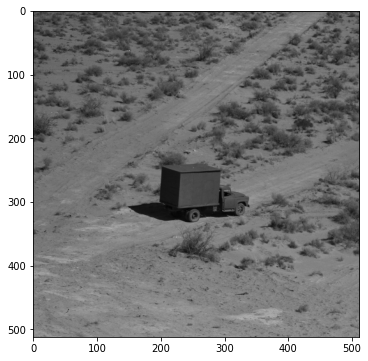

In [17]:
img2 = pimg.imread('Images/7.1.01.tiff')

plt.figure(figsize=(6,6))
plt.imshow(img2,cmap='gray')
plt.show()

### 2.1
Circulary convolution of image and an averaging filter of size 5×5.

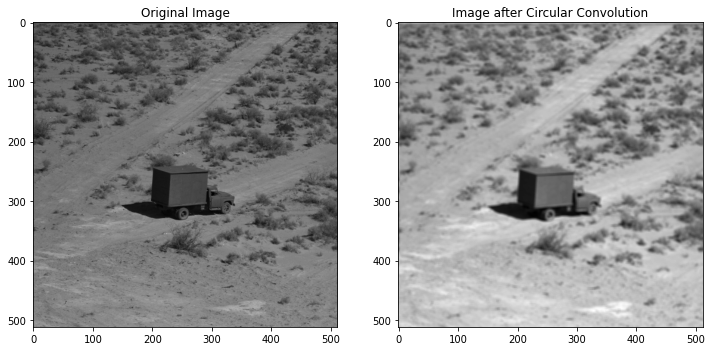

In [18]:
# Filter and Image
F = np.ones((5,5))/25
I = img2

# Circular Convolution
CircularConvolutedImage = CircularConvolution(I,F)

# Displaying Results
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.imshow(I,cmap='gray')
plt.title("Original Image")

plt.subplot(1,2,2)
plt.imshow(CircularConvolutedImage,cmap='gray')
plt.title("Image after Circular Convolution")

plt.show()

### 2.2
Using Padded Image and Filter to perform the Linear Convolution using Circular Convolution Function.

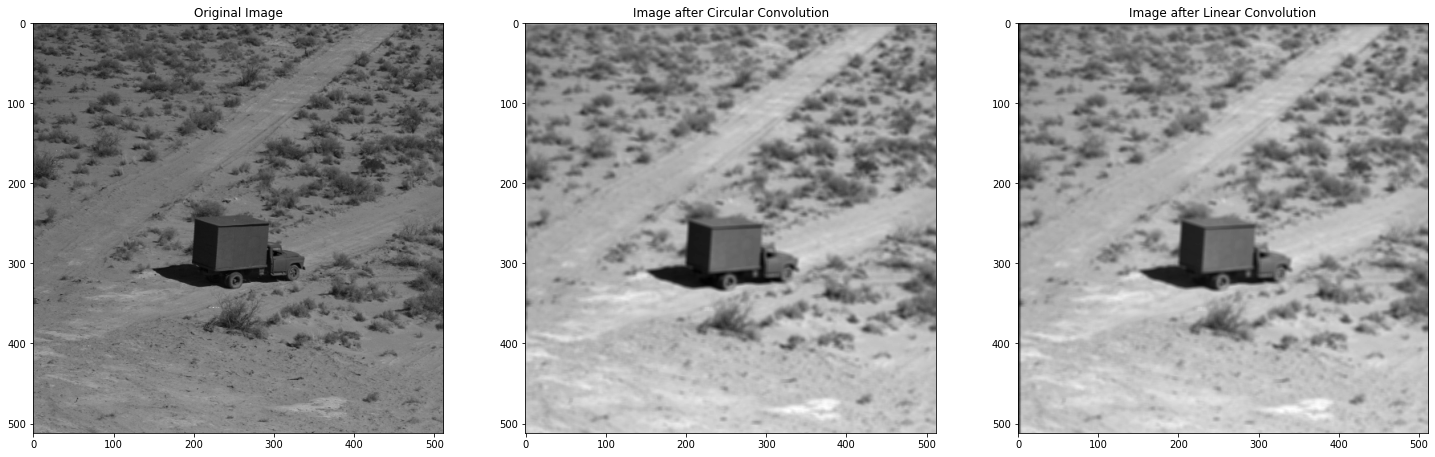

In [19]:
# Filter and Image
F = np.ones((5,5))/25
I = img2

# Padding
I_Padded,F_Padded = Pad(I,F)

# Circular Convolution
CircularConvolutedImage = CircularConvolution(I,F)

# Linear Convolution
LinearConvolutedImage = CircularConvolution(I_Padded, F)[:I.shape[0],:I.shape[1]]

# Displaying Results
plt.figure(figsize = (25,15))

plt.subplot(1,3,1)
plt.imshow(I,cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(CircularConvolutedImage,cmap='gray')
plt.title("Image after Circular Convolution")

plt.subplot(1,3,3)
plt.imshow(LinearConvolutedImage,cmap='gray')
plt.title("Image after Linear Convolution")

plt.show()

### 2.3
Performing Linear Convolution using the DFT of zero padded images.

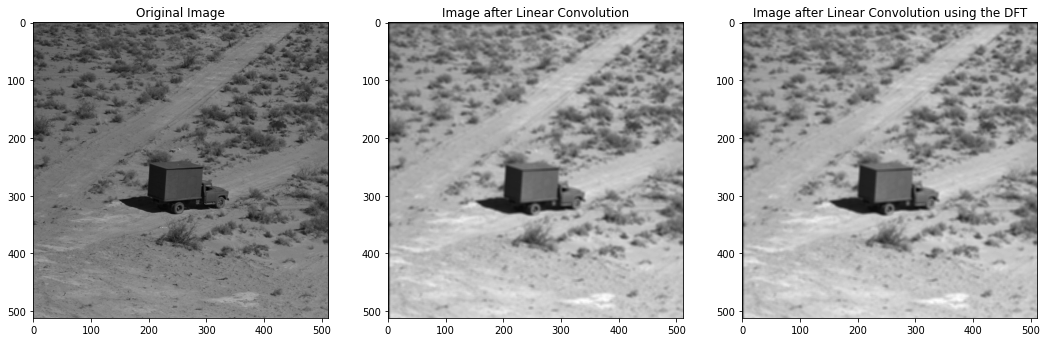

In [20]:
# Filter and Image
F = np.ones((5,5))/25
I = img2

# Padding
I_Padded,F_Padded = Pad(I,F)

# Linear Convolution
LinearConvolutedImage = CircularConvolution(I_Padded, F)[:I.shape[0],:I.shape[1]]

# Linear Convolution using DFT
I_Padded_DFT = DFTMatrixMultiplication(I_Padded)
F_Padded_DFT = DFTMatrixMultiplication(F_Padded)

J_Padded_DFT = np.multiply(I_Padded_DFT,F_Padded_DFT)
J_Padded = IDFTMatrixMultiplication(J_Padded_DFT)

J = J_Padded[:I.shape[0],:I.shape[1]]

# Displaying Results
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.imshow(I,cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(LinearConvolutedImage,cmap='gray')
plt.title("Image after Linear Convolution")

plt.subplot(1,3,3)
plt.imshow(J,cmap='gray')
plt.title("Image after Linear Convolution using the DFT")

plt.show()

Verifying Linear Convolution results in Time and Frequency Domain

In [21]:
np.array_equal(J, LinearConvolutedImage)

True

## Q3 - Image Denoising using Linear Filters

### Functions
- Generating a Linear Filter
- 2D Gaussian Function
- Generating Gaussian Filter

#### Generating a Linear Filter

In [22]:
def LinearFilter(Size):
    return (np.ones((Size,Size)))/(Size*Size)

#### 2D Gaussian Function

In [23]:
def Gaussian2D(x,y,mu,sigma):
    t2 = np.exp(-1*(pow(x-mu,2) + pow(y-mu,2))/(2*pow(sigma,2)))
    t1 = 1/(2*np.pi*sigma*sigma)
    return t1*t2 

#### Generating Gaussian Filter

In [24]:
def GaussianFilter(Size,StdDev):
    # Assuming the filter has values of 2D gaussian function in all 4-Directions.
    # So, center of filter should have the gaussian peak.
    mu = (Size-1)/2
    sigma = StdDev
    Filter = np.zeros((Size,Size))
    
    for i in range(Size):
        for j in range(Size):
            Filter[i][j] = Gaussian2D(i,j,mu,sigma)
            
    return Filter 

Reading and Displaying Image

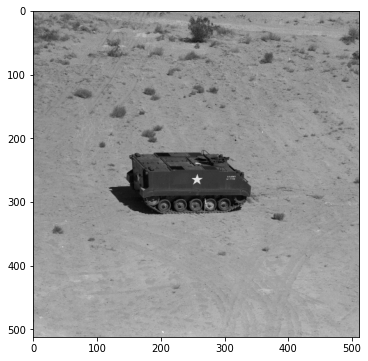

In [25]:
img3 = pimg.imread('Images/7.1.08.tiff')

plt.figure(figsize=(6,6))
plt.imshow(img,cmap='gray')
plt.show()

Generating Image with Gaussian Noise

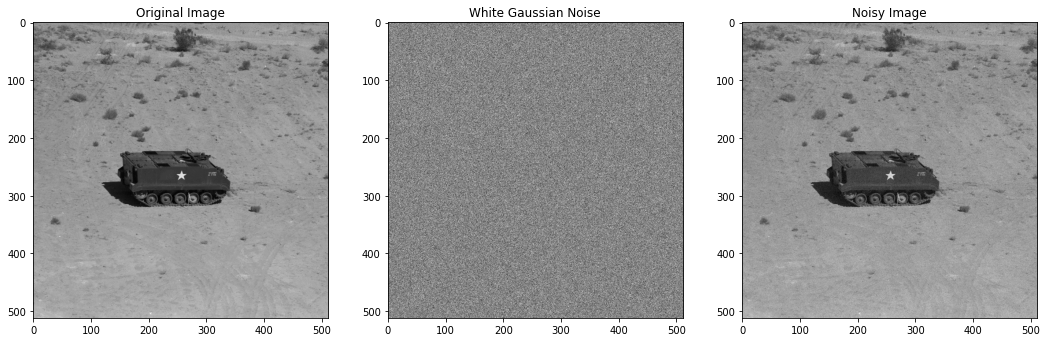

In [26]:
# Parameters of Gaussian Noise
mu = 0
std = 5

# Additive White Gaussian Noise
Noise = np.random.normal(mu,std,img3.shape)

# Noisy Image
I = img3 + Noise

# Displaying Results
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img3, cmap='gray')

plt.subplot(1,3,2)
plt.title("White Gaussian Noise")
plt.imshow(Noise, cmap='gray')


plt.subplot(1,3,3)
plt.title("Noisy Image")
plt.imshow(I, cmap='gray')

plt.show()

### 3.1
Average filter of size M×M for denoising. Varying M from 3 to 15 in increments of 2 and observe the tradeoff between denoising and smoothing. 

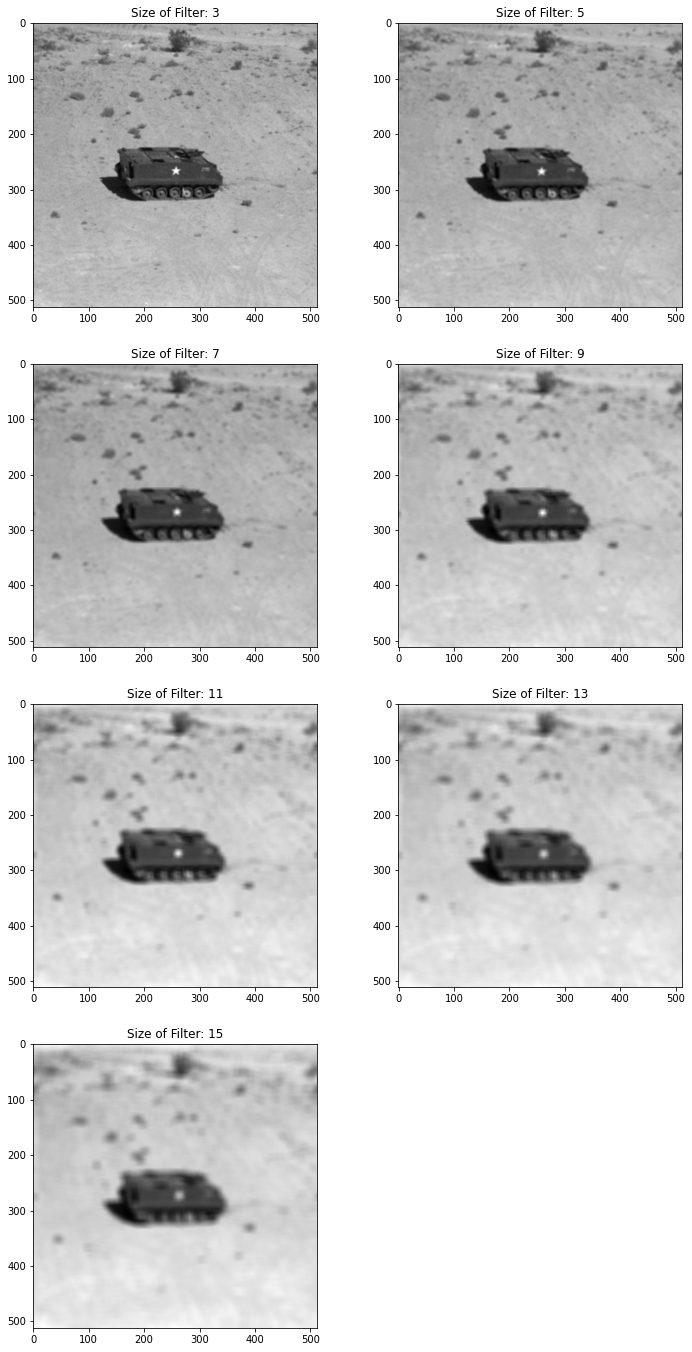

In [27]:
M = np.arange(3,17,2)
n = M.shape[0]

# Displaying Results
plt.figure(figsize=(12,24))

for i in range(n):
	plt.subplot(int(np.ceil(n/2)),2,i+1)
	plt.title('Size of Filter: ' + str(M[i]))
	plt.imshow(CircularConvolution(I, LinearFilter(M[i])),cmap='gray')

plt.show()

With increase of filter size, denoising of the image gets better but simultaneously image gets smoothened. $(5,5)$ filter size is the optimal one to denoise the image without much smoothening.

### 3.2
Gaussian filter of size 5×5. Experiment with the standard deviation $\sigma_{h}$ of the filter from 0.5 to 5 in steps of 0.5 and observe its effect on denoising.

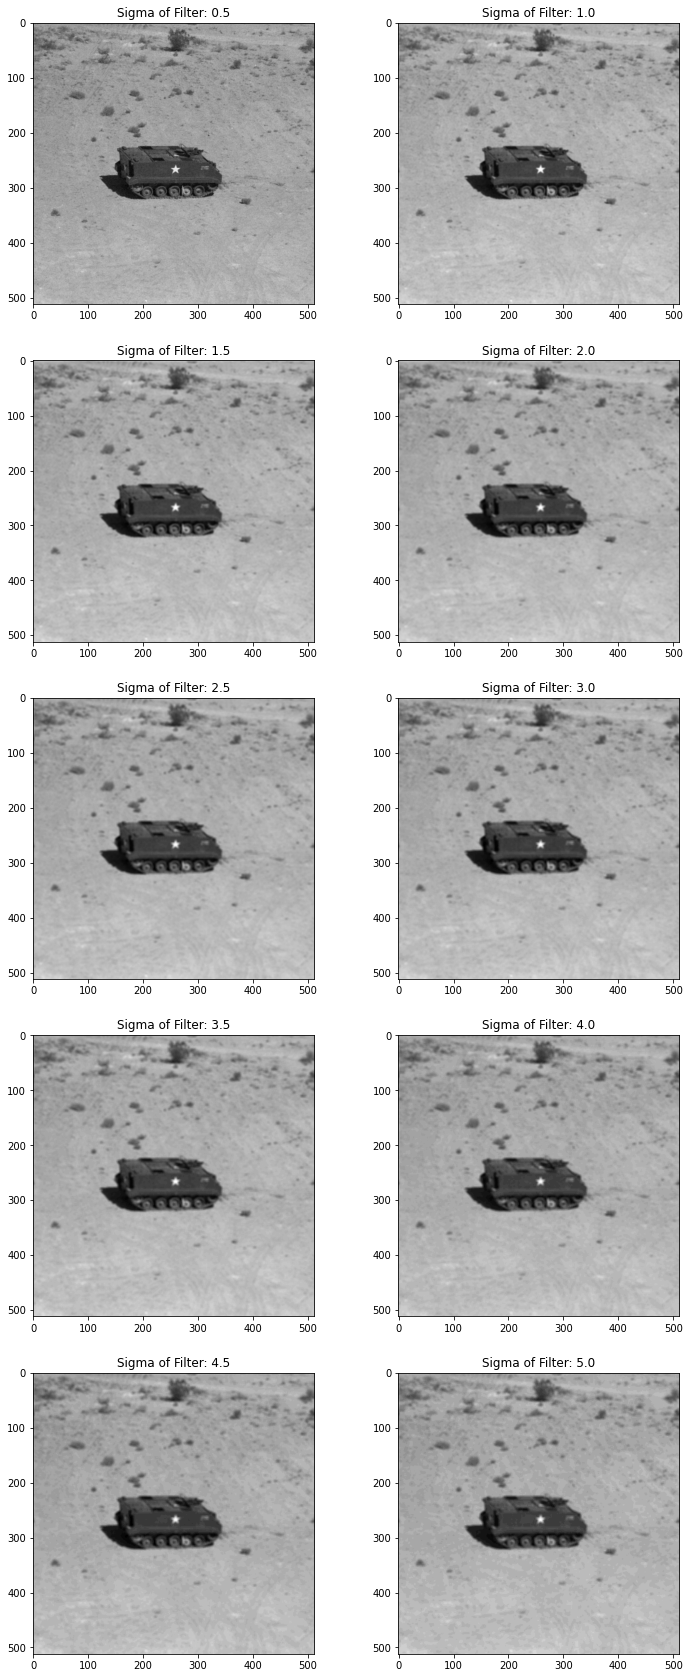

In [28]:
Sigmas = np.arange(0.5,5.5,0.5)
n = Sigmas.shape[0]

# Displaying Results
plt.figure(figsize=(12,30))

for i in range(n):
	plt.subplot(int(np.ceil(n/2)),2,i+1)
	plt.title('Sigma of Filter: ' + str(Sigmas[i]))
	plt.imshow(CircularConvolution(I, GaussianFilter(5,Sigmas[i])), cmap='gray')

plt.show()

With increase of standard deviation of Gaussian Filter, image gets denoised and gets slightly smoothened.